<a href="https://colab.research.google.com/github/jainprashant03/ML_projects/blob/Tutorials%40Udemy/Workbook_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(120,1258):
  X_train.append(training_set_scaled[i-120:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train,y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.0180445 , 0.0180817 ,
        0.00710618],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.0180817 , 0.00710618,
        0.0064923 ],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.00710618, 0.0064923 ,
        0.00225091],
       ...,
       [0.78201503, 0.79792023, 0.81851328, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.79792023, 0.81851328, 0.82688444, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.81851328, 0.82688444, 0.82308952, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train

array([0.0064923 , 0.00225091, 0.00682714, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train,y_train, epochs=100, batch_size = 32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - loss: 0.0854
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - loss: 0.0077
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - loss: 0.0071
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - loss: 0.0063
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - loss: 0.0055
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step - loss: 0.0049
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 271ms/step - loss: 0.0050
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 249ms/step - loss: 0.0046
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 254ms/step - loss: 0.0056
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - loss: 0.0045
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 295ms/step - loss: 0.0039
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 268ms/step - loss: 0.0045
Epoch 13/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - loss: 0.0043
Epoch 14/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - loss: 0.0049
Epoch 15/100
36/36 ━━━━━━━━━━━━━━━━

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120 :].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test = []
for i in range(120,140):
  X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


In [ ]:
predicted_stock_price

array([[763.18976],
       [760.9393 ],
       [760.44147],
       [761.0847 ],
       [763.5056 ],
       [768.2787 ],
       [773.533  ],
       [776.96796],
       [778.6296 ],
       [779.1066 ],
       [778.9306 ],
       [778.37537],
       [777.7341 ],
       [777.6058 ],
       [778.0099 ],
       [781.1678 ],
       [786.74536],
       [793.60724],
       [798.7816 ],
       [798.0378 ]], dtype=float32)

### Visualising the results

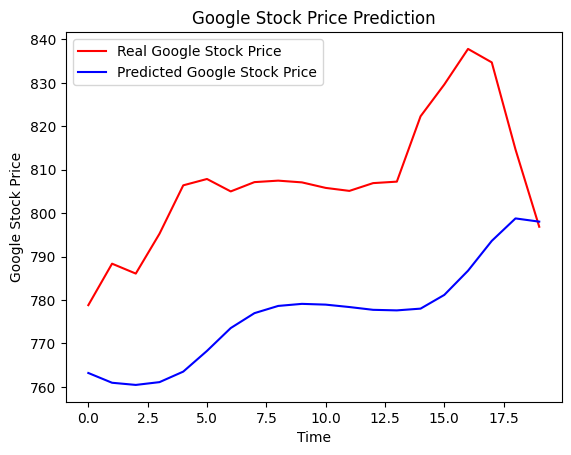

In [ ]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()